In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

In [54]:
from backtesting.backtest import Backtest
from backtesting.scenarios import Scenario
from config import DEFAULT_CONSTRAINTS, DEFAULT_PORTFOLIO_SETUP, DEFAULT_STRATEGY_CONFIG
from data.data import Benchmarks


scenario = Scenario(
    name="test backtest function",
    start_date="2020-01-01",
    end_date="2022-01-01",
    benchmark=Benchmarks.SP500,
    constraints=DEFAULT_CONSTRAINTS,
    portfolio_config=DEFAULT_PORTFOLIO_SETUP,
    verbose=True,
)  
scenario.set_strategies(DEFAULT_STRATEGY_CONFIG)
backtest = Backtest(scenario, verbose=True)
backtest.run_batch(verbose=True)

Portfolio setup: {
    "initial_capital": 100000,
    "initial_holdings": {},
    "initial_value": 0,
    "capital_growth_freq": "M",
    "new_capital_growth_pct": 0,
    "new_capital_growth_amt": 10000,
    "allocation_method": "equal",
    "exclude_sectors": [],
    "include_countries": [
        "United States"
    ],
    "min_market_cap": 0,
    "max_market_cap": Infinity
}
Strategies: {
    "macd_x": true,
    "rsi_x": true,
    "b_bands": true,
    "z": true
}
Backtest starting... swoosh!
Universe size: 480
Total trading days: 505
Total strategies: 4
Starting in 2020-01-01
Ending in 2022-01-01


Backtesting by strategy: 100%|██████████| 4/4 [00:01<00:00,  2.73strategy/s]


Short trade amount 260 too large violates max trade constraint
Short trade amount 291 too large violates max trade constraint
Short trade amount 254 too large violates max trade constraint
Short trade amount 322 too large violates max trade constraint
Short trade amount 266 too large violates max trade constraint
Backtest completed!


In [55]:
backtest.generate_report()

Report saved to: reports/portfolio_report_20250611_231037.pdf


'reports/portfolio_report_20250611_231037.pdf'

In [31]:
p = backtest.get_portfolio()

In [32]:
a = backtest.generate_advanced_analytics()

2020-03-31 00:00:00 72291.03139672932


<Axes: >

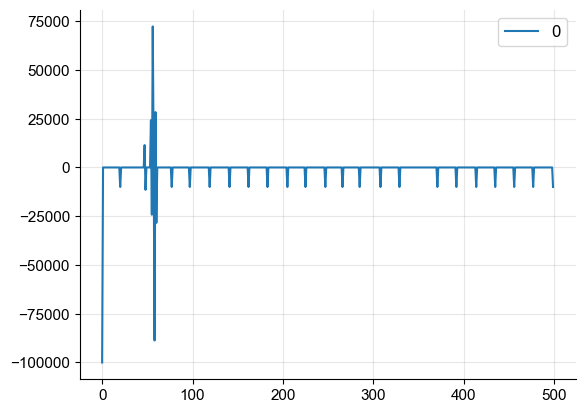

In [38]:
for date, cashflow in a.cashflow_history.items():
    if cashflow > 50000:
        print(date, cashflow)
pd.DataFrame(list(a.cashflow_history.values())).plot()

In [13]:
sum(p.transaction_history[list(p.transaction_history.keys())[0]].values())

np.float64(14.439280536348422)

In [38]:
d - np.timedelta64(1, 'D')

np.datetime64('2020-03-10T00:00:00')

In [37]:
import numpy as np

p.holdings_history[d - np.timedelta64(1, 'D')]

{'ADBE': np.float64(1263461133.3710213),
 'AMZN': np.float64(6669025798.773238),
 'AAPL': np.float64(47328.734987837),
 'CRL': np.float64(6563346756.657782),
 'INTC': np.float64(260623078.95792246),
 'JNJ': np.float64(22422781.208487153),
 'LDOS': np.float64(11150433433.448498),
 'LLY': np.float64(22436410.922355358),
 'TSLA': np.float64(24864953091.268044),
 'TYL': np.float64(243935118.1632177),
 'WDC': np.float64(2563.7625328525555),
 'NEE': np.float64(3485650550.028608),
 'VRSN': np.float64(6652.518027851344),
 'AEP': np.float64(342384798.6325233),
 'RSG': np.float64(9556617932.509819),
 'SMCI': np.float64(91069039.23243666),
 'WM': np.float64(958194683.6947497),
 'COO': np.float64(266365.386276796),
 'EFX': np.float64(3660942349.0494895),
 'MCD': np.float64(1199404.3500269596),
 'NOW': np.float64(1148480371.5023),
 'VRSK': np.float64(190623580.02298772),
 'VICI': np.float64(40391258186.05473),
 'AKAM': np.float64(6829185133.579237),
 'AMT': np.float64(1569580469.546369),
 'BRO': np

In [39]:
import numpy as np

dd = np.datetime64("2020-03-31 00:00:00")


In [48]:
for t, s in p.trading_plan_history[dd + np.timedelta64(13, 'D')].items():
    if s != 0:
        print(t, s)

EQT 1
NEM 1
WBA -1


In [43]:
for t, s in p.transaction_history[dd].items():
    print(t, s)

AOS -25.841437772707277
AEE -21.97344380180759
AMT -1.3971668793794352
AWK -10.628062751096547
ATO -0.29323901822513115
BDX -5.541042382164618
CAH -11.091823993766273
CINF -4.437411374430921
CMS -12.42017927744172
CL -14.034717996967094
CMCSA -1.5315086939310718
CCI -5.199217307862217
DLR -13.550098966554739
D -4.163538282365312
FAST -3.9324182709272653
GNRC -0.5486219448200239
HSY -0.9523068435850937
JKHY -5.760558092525255
JNJ -13.136772195028554
LLY -11.548222852395273
MCK -2.939616988740836
MRK -2.022248904413683
MNST -22.75169048572631
PM -0.9070400422212203
POOL -1.1454908192129531
PG -1.1096853180659378
RMD -2.1584763484217833
SBAC -2.3693089514496206
TMO -0.3739386526952858
WBD -2712.4920648270486
XEL -24.32405467203897
XYL -1.7432700292444836


In [44]:
for t,s in p.holdings_history[dd].items():
    print(t, s)

WM 13.678624185108486
ENPH 78.87633345285963
CHD 1.4125414116285129
CSGP 5.381298529006676
IRM 5.113125981511212
REGN 12.562699937521746
ROL 4.827339218772343
CTRA 41.65547590938124
EQT 316.02312834682004
CPB 27.46576466584995
ED 16.328115232923004
WEC 14.334579116737306
COST 4.886448839223921
K 30.3484384254946
GIS 8.662774036253177
GILD 5.818314068138684
SJM 4.364232225434526
CLX 9.739470928922426
KR 51.73612157375278
WBA 40.70050182812897
WMT 27.00917510214493


In [53]:
re = a.performance_metrics()
re["monthly_returns"]

2020-03-31    -0.375478
2020-04-30    -0.903690
2020-05-31    10.278006
2020-06-30     0.733311
2020-07-31    -0.149151
2020-08-31     0.262987
2020-09-30     0.046252
2020-10-31    -0.366026
2020-11-30     0.291741
2020-12-31     0.209702
2021-01-31     0.090788
2021-02-28    -0.130844
2021-03-31    -0.072763
2021-04-30     0.047416
2021-05-31     0.416183
2021-06-30    -0.223954
2021-07-31     0.087988
2021-08-31     0.062898
2021-09-30     0.042627
2021-10-31    -0.379280
2021-11-30     0.621910
2021-12-31    -0.178206
Freq: ME, dtype: float64